<a href="https://colab.research.google.com/github/jaaaamj0711/DACON/blob/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94%20%EC%98%88%EC%B8%A1%20AI%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/result_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 폰트 설치(런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cach/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# !pip install dataprep

In [2]:
# 필요한 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
# from dataprep.eda import plot, plot_correlation, create_report, plot_missing
from tqdm import tqdm
import os

In [4]:
# 폴더 경로 설정
os.chdir('/content/drive/MyDrive/park/data/')
os.listdir()

['age_gender_info.csv',
 'sample_submission.csv',
 'train.csv',
 'test.csv',
 '=0.3.8”']

In [5]:
# 데이터 불러오기
age = pd.read_csv("age_gender_info.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [6]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


# 데이터 전처리(공지되어있는 오류 사항)

### 단지코드 오류 행 삭제

In [8]:
train = train.set_index("단지코드") # 단지코드 인덱스 변경
train = train.drop(index = ['C2085', 'C1397', 'C2431', 'C1649', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']) # 공지에 올라온 오류 단지코드 삭제
train = train.reset_index() # 인덱스를 다시 컬럼으로 변경

### 총 세대수 오류 해결

In [9]:
train.groupby(train.단지코드).sum().reset_index().head()  # 단지코드별로 각 column의 sum 값을 직접 계산

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C1000,3962,316.53,566,70.0,0.0,7.0,3066.0,3367.0
1,C1004,9899,743.60,521,57.0,0.0,38.0,2907.0,1767.0
2,C1005,3432,163.08,1144,48.0,0.0,24.0,2850.0,1128.0
3,C1013,6540,230.71,1308,80.0,0.0,30.0,5595.0,8325.0
4,C1014,6972,344.63,996,35.0,0.0,14.0,5761.0,4956.0


In [10]:
train_range = train.groupby(train.단지코드).sum().reset_index()
train_range = train_range[['단지코드', '전용면적별세대수']]
test_range = test.groupby(test.단지코드).sum().reset_index()
test_range = test_range[['단지코드', '전용면적별세대수']]

In [11]:
train = pd.merge(train, train_range, left_on = '단지코드', right_on = '단지코드', how = 'left')
test = pd.merge(test, test_range, left_on = '단지코드', right_on = '단지코드', how = 'left')

In [12]:
train = train.drop(["총세대수"], axis=1)
test = test.drop(["총세대수"], axis=1)

# 데이터 전처리

## 컬럼명 변경

In [14]:
# 컬럼명 변경
train.rename(columns={'도보 10분거리 내 지하철역 수(환승노선 수 반영)':'지하철', '도보 10분거리 내 버스정류장 수':'버스', '전용면적별세대수_y':'총세대수','전용면적별세대수_x':'전용면적별세대수'}, inplace = True)
test.rename(columns={'도보 10분거리 내 지하철역 수(환승노선 수 반영)':'지하철', '도보 10분거리 내 버스정류장 수':'버스', '전용면적별세대수_y':'총세대수','전용면적별세대수_x':'전용면적별세대수'}, inplace = True)

In [15]:
train.head()

,단지코드,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총세대수
0,C2515,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0,545
1,C2515,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,545
2,C2515,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,545
3,C2515,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0,545
4,C2515,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0,545


## 결측치 확인

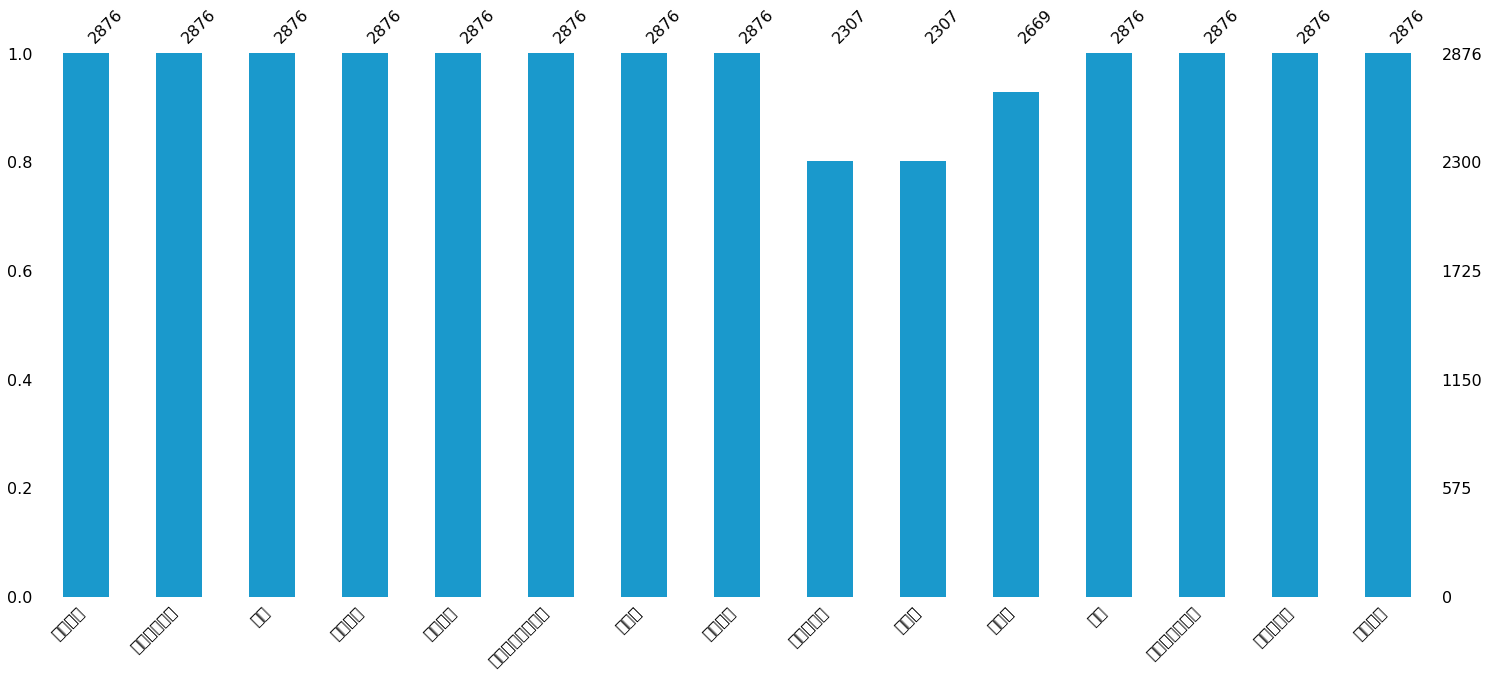

In [16]:
# 결측치 확인(train)
import missingno as msno
msno.bar(df=train.iloc[:,:], color =(0.1, 0.6, 0.8))

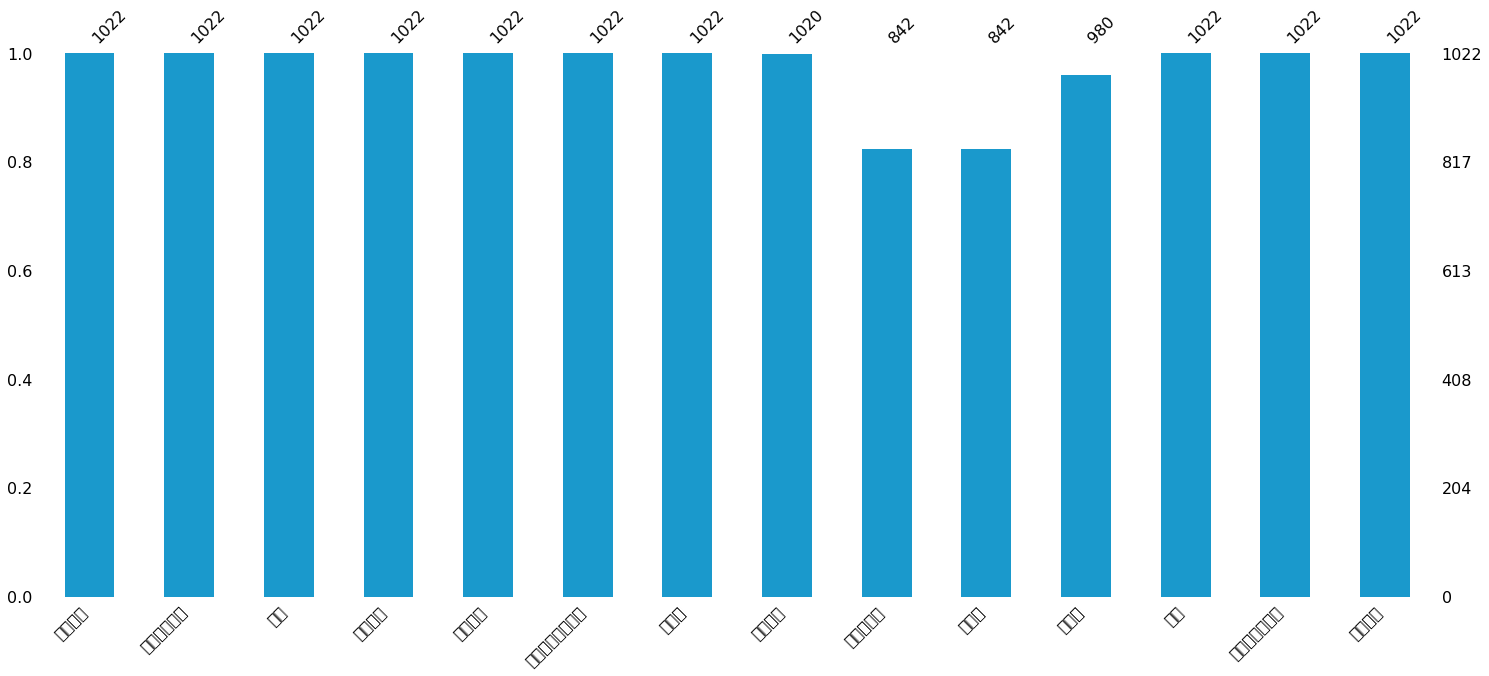

In [17]:
# 결측치 확인(test)
msno.bar(df=test.iloc[:,:], color =(0.1, 0.6, 0.8))

In [18]:
train.head()

,단지코드,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총세대수
0,C2515,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0,545
1,C2515,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,545
2,C2515,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,545
3,C2515,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0,545
4,C2515,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0,545


## 결측치 전처리

- train: 임대보증금, 임대료, 지하철, 버스
- test: 자격유형, 임대보증금, 임대료, 지하철, 버스

In [19]:
# 임대보증금, 임대료
# -, 결측치 처리
## nan으로 변경 후 float 변경
train = train.replace({'-' : np.nan})
train['임대보증금'] = train['임대보증금'].astype(float)
train['임대료'] = train['임대료'].astype(float)

test = test.replace({'-' : np.nan})
test['임대보증금'] = test['임대보증금'].astype(float)
test['임대료'] = test['임대료'].astype(float)

In [20]:
# test의 자격유형 결측치 전처리
test[test['자격유형'].isnull()]

,단지코드,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,총세대수
196,C2411,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0,961
258,C2253,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0,1161


In [21]:
test[test['단지코드']=="C2411"]

,단지코드,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,총세대수
193,C2411,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0,961
194,C2411,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0,961
195,C2411,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0,961
196,C2411,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0,961
197,C2411,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0,961


- 단지코드 C2411의 자격유형은 모두 A

In [22]:
test.loc[(test['자격유형'].isnull()) & (test['단지코드'] == "C2411"), '자격유형'] = 'A'

In [23]:
test[test['단지코드']=="C2411"]

,단지코드,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,총세대수
193,C2411,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0,961
194,C2411,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0,961
195,C2411,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0,961
196,C2411,아파트,경상남도,국민임대,46.90,240,25.0,A,71950000.0,37470.0,0.0,2.0,840.0,961
197,C2411,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0,961


In [24]:
test[test['단지코드']=="C2253"]

,단지코드,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,총세대수
258,C2253,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0,1161
259,C2253,아파트,강원도,영구임대,31.32,239,0.0,C,3731000.0,83020.0,0.0,2.0,173.0,1161
260,C2253,아파트,강원도,영구임대,31.32,149,0.0,C,3731000.0,83020.0,0.0,2.0,173.0,1161
261,C2253,상가,강원도,임대상가,13.77,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
262,C2253,상가,강원도,임대상가,22.89,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
263,C2253,상가,강원도,임대상가,22.91,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
264,C2253,상가,강원도,임대상가,23.79,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
265,C2253,상가,강원도,임대상가,23.79,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
266,C2253,상가,강원도,임대상가,23.86,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
267,C2253,상가,강원도,임대상가,23.86,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161


- 단지코드 C2253, 임대건물구분 아파트 자격유형은 모두 C

In [25]:
test.loc[(test['자격유형'].isnull()) & (test['단지코드'] == "C2253"), '자격유형'] = 'C'

In [26]:
test[test['단지코드']=="C2253"]

,단지코드,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,총세대수
258,C2253,아파트,강원도,영구임대,26.37,745,0.0,C,2249000.0,44770.0,0.0,2.0,173.0,1161
259,C2253,아파트,강원도,영구임대,31.32,239,0.0,C,3731000.0,83020.0,0.0,2.0,173.0,1161
260,C2253,아파트,강원도,영구임대,31.32,149,0.0,C,3731000.0,83020.0,0.0,2.0,173.0,1161
261,C2253,상가,강원도,임대상가,13.77,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
262,C2253,상가,강원도,임대상가,22.89,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
263,C2253,상가,강원도,임대상가,22.91,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
264,C2253,상가,강원도,임대상가,23.79,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
265,C2253,상가,강원도,임대상가,23.79,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
266,C2253,상가,강원도,임대상가,23.86,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161
267,C2253,상가,강원도,임대상가,23.86,1,0.0,D,NaN,NaN,0.0,2.0,173.0,1161


# 변수 추출
- 전용면적, 세대수, 임대보증금,임대료값에 대한 통계값 추출한 변수 추가
- 단지내주차면수를 총세대수로 나누어 새로운 변수를 추가


In [27]:
code_list = train['단지코드'].unique().tolist()

In [28]:
single_columns = ['단지코드', '총세대수', '공가수', '지역', '단지내주차면수', '지하철', '버스', '등록차량수']
multi_columns = ['임대건물구분', '공급유형']
all_columns = single_columns + multi_columns

In [29]:
### train ###
df = pd.DataFrame(columns = all_columns, index = [0])

new_train_base = []

for code in code_list:

  df2 = df.copy()
  code_df = train.loc[train['단지코드'] == code]

  ## single_col

  df2['단지코드'] = code_df['단지코드'].unique()[0]
  df2['총세대수'] = code_df['총세대수'].unique()[0]
  df2['공가수'] = code_df['공가수'].unique()[0]
  df2['지역'] = code_df['지역'].unique()[0]
  df2['단지내주차면수'] = code_df['단지내주차면수'].unique()[0]
  df2['지하철'] = code_df['지하철'].unique()[0]
  df2['버스'] = code_df['버스'].unique()[0]

  ## 추가변수
  df2["주차면수/총세대"] =code_df["단지내주차면수"].unique()[0] / code_df["총세대수"].unique()[0]

  ## 전용면적
  df2['전용면적_sum'] = code_df['전용면적'].sum()
  df2['전용면적_mean'] = code_df['전용면적'].mean()
  df2['전용면적_min'] = code_df['전용면적'].min()
  df2['전용면적_max'] = code_df['전용면적'].max()
  df2['전용면적_std'] = code_df['전용면적'].std()
  df2['전용면적_range'] = code_df['전용면적'].max() - code_df['전용면적'].min()

  ## 세대수 
  df2['세대수_sum'] = code_df['전용면적별세대수'].sum()  
  df2['세대수_mean'] = code_df['전용면적별세대수'].mean()
  df2['세대수_min'] = code_df['전용면적별세대수'].min()
  df2['세대수_max'] = code_df['전용면적별세대수'].max()
  df2['세대수_std'] = code_df['전용면적별세대수'].std()
  df2['세대수_range'] = code_df['전용면적별세대수'].max() - code_df['전용면적별세대수'].min()

  ## multi_col
  df2['임대건물구분'] = '/'.join(np.sort(code_df['임대건물구분'].unique()).tolist())
  df2['공급유형'] = '/'.join(np.sort(code_df['공급유형'].unique()).tolist())

  ## target
  df2['등록차량수'] = code_df['등록차량수'].unique()[0]

  ## 추가변수(임대보증금에 대한 값에 대한 통계값 추출)
  df2['임대보증금_sum'] = code_df['임대보증금'].sum()
  df2['임대보증금_mean'] = code_df['임대보증금'].mean()
  df2['임대보증금_min'] = code_df['임대보증금'].min()
  df2['임대보증금_max'] = code_df['임대보증금'].max()
  df2['임대보증금_std'] = code_df['임대보증금'].std()
  df2['임대보증금_range'] = code_df['임대보증금'].max() - code_df['임대보증금'].min()

  ## 추가변수(임대료에 대한 값에 대한 통계값 추출)
  df2['임대료_sum'] = code_df['임대료'].sum()
  df2['임대료_mean'] = code_df['임대료'].mean()
  df2['임대료_min'] = code_df['임대료'].min()
  df2['임대료_max'] = code_df['임대료'].max()
  df2['임대료_std'] = code_df['임대료'].std()
  df2['임대료_range'] = code_df['임대료'].max() - code_df['임대료'].min()

  new_train_base.append(df2)

new_train = pd.concat(new_train_base)

In [30]:
new_train.head()

,단지코드,총세대수,공가수,지역,단지내주차면수,지하철,버스,등록차량수,임대건물구분,공급유형,주차면수/총세대,전용면적_sum,전용면적_mean,전용면적_min,전용면적_max,전용면적_std,전용면적_range,세대수_sum,세대수_mean,세대수_min,세대수_max,세대수_std,세대수_range,임대보증금_sum,임대보증금_mean,임대보증금_min,임대보증금_max,임대보증금_std,임대보증금_range,임대료_sum,임대료_mean,임대료_min,임대료_max,임대료_std,임대료_range
0,C2515,545,17.0,경상남도,624.0,0.0,3.0,205.0,아파트,국민임대,1.144954,310.42,44.345714,33.48,51.97,6.981112,18.49,545,77.857143,19,276,92.611066,257,117510000.0,1.678714e+07,9216000.0,23042000.0,5.398382e+06,13826000.0,976900.0,139557.142857,82940.0,190090.0,42079.044553,107150.0
0,C1407,1216,13.0,대전광역시,1285.0,1.0,1.0,1064.0,아파트,국민임대,1.056743,453.79,41.253636,30.95,51.24,7.541263,20.29,1216,110.545455,34,288,75.477631,254,313616000.0,2.851055e+07,15620000.0,42056000.0,9.910277e+06,26436000.0,1944030.0,176730.000000,127350.0,253520.0,45411.848454,126170.0
0,C1945,755,6.0,경기도,734.0,1.0,3.0,730.0,아파트,국민임대,0.972185,303.06,50.510000,39.72,59.88,9.082674,20.16,755,125.833333,52,207,53.225620,155,135910000.0,2.265167e+07,15607000.0,29209000.0,6.094701e+06,13602000.0,1134640.0,189106.666667,130070.0,244020.0,51059.980676,113950.0
0,C1470,696,14.0,전라북도,645.0,0.0,2.0,553.0,아파트,국민임대,0.926724,171.93,42.982500,36.55,51.93,7.706246,15.38,696,174.000000,26,246,100.810052,220,70891000.0,1.772275e+07,12015000.0,25233000.0,6.753065e+06,13218000.0,480600.0,120150.000000,102130.0,144180.0,21378.507899,42050.0
0,C1898,566,9.0,전라북도,517.0,0.0,6.0,415.0,아파트,국민임대,0.913428,255.45,42.575000,36.55,51.93,6.826281,15.38,566,94.333333,13,230,95.621476,217,104534000.0,1.742233e+07,12015000.0,25233000.0,6.067941e+06,13218000.0,714890.0,119148.333333,102130.0,144180.0,19152.348594,42050.0


In [32]:
code_list = test['단지코드'].unique().tolist()

In [33]:
single_columns = ['단지코드', '총세대수', '공가수', '지역', '단지내주차면수', '지하철', '버스']
multi_columns = ['임대건물구분', '공급유형']
all_columns = single_columns + multi_columns

In [34]:
### test ###
df = pd.DataFrame(columns = all_columns, index = [0])

new_test_base = []

for code in code_list:

  df2 = df.copy()
  code_df = test.loc[test['단지코드'] == code]

  ## single_col

  df2['단지코드'] = code_df['단지코드'].unique()[0]
  df2['총세대수'] = code_df['총세대수'].unique()[0]
  df2['공가수'] = code_df['공가수'].unique()[0]
  df2['지역'] = code_df['지역'].unique()[0]
  df2['단지내주차면수'] = code_df['단지내주차면수'].unique()[0]
  df2['지하철'] = code_df['지하철'].unique()[0]
  df2['버스'] = code_df['버스'].unique()[0]

  ## 추가변수
  df2["주차면수/총세대"] =code_df["단지내주차면수"].unique()[0] / code_df["총세대수"].unique()[0]

  ## 전용면적
  df2['전용면적_sum'] = code_df['전용면적'].sum()
  df2['전용면적_mean'] = code_df['전용면적'].mean()
  df2['전용면적_min'] = code_df['전용면적'].min()
  df2['전용면적_max'] = code_df['전용면적'].max()
  df2['전용면적_std'] = code_df['전용면적'].std()
  df2['전용면적_range'] = code_df['전용면적'].max() - code_df['전용면적'].min()

  ## 세대수 
  df2['세대수_sum'] = code_df['전용면적별세대수'].sum()  
  df2['세대수_mean'] = code_df['전용면적별세대수'].mean()
  df2['세대수_min'] = code_df['전용면적별세대수'].min()
  df2['세대수_max'] = code_df['전용면적별세대수'].max()
  df2['세대수_std'] = code_df['전용면적별세대수'].std()
  df2['세대수_range'] = code_df['전용면적별세대수'].max() - code_df['전용면적별세대수'].min()

  ## multi_col
  df2['임대건물구분'] = '/'.join(np.sort(code_df['임대건물구분'].unique()).tolist())
  df2['공급유형'] = '/'.join(np.sort(code_df['공급유형'].unique()).tolist())

  ## 추가변수(임대보증금에 대한 값에 대한 통계값 추출)
  df2['임대보증금_sum'] = code_df['임대보증금'].sum()
  df2['임대보증금_mean'] = code_df['임대보증금'].mean()
  df2['임대보증금_min'] = code_df['임대보증금'].min()
  df2['임대보증금_max'] = code_df['임대보증금'].max()
  df2['임대보증금_std'] = code_df['임대보증금'].std()
  df2['임대보증금_range'] = code_df['임대보증금'].max() - code_df['임대보증금'].min()

  ## 추가변수(임대료에 대한 값에 대한 통계값 추출)
  df2['임대료_sum'] = code_df['임대료'].sum()
  df2['임대료_mean'] = code_df['임대료'].mean()
  df2['임대료_min'] = code_df['임대료'].min()
  df2['임대료_max'] = code_df['임대료'].max()
  df2['임대료_std'] = code_df['임대료'].std()
  df2['임대료_range'] = code_df['임대료'].max() - code_df['임대료'].min()

  new_test_base.append(df2)

new_test = pd.concat(new_test_base)

In [35]:
new_test.head()

,단지코드,총세대수,공가수,지역,단지내주차면수,지하철,버스,임대건물구분,공급유형,주차면수/총세대,전용면적_sum,전용면적_mean,전용면적_min,전용면적_max,전용면적_std,전용면적_range,세대수_sum,세대수_mean,세대수_min,세대수_max,세대수_std,세대수_range,임대보증금_sum,임대보증금_mean,임대보증금_min,임대보증금_max,임대보증금_std,임대보증금_range,임대료_sum,임대료_mean,임대료_min,임대료_max,임대료_std,임대료_range
0,C1072,754,14.0,경기도,683.0,0.0,2.0,아파트,국민임대,0.905836,387.49,48.436250,39.79,51.96,4.256366,12.17,754,94.250000,30,198,53.625021,168,304962000.0,3.812025e+07,22830000.0,43497000.0,7.194365e+06,20667000.0,2126750.0,265843.750000,189840.0,296780.0,38479.156858,106940.0
0,C1128,1354,9.0,경기도,1216.0,0.0,3.0,아파트,국민임대,0.898080,415.61,46.178889,39.79,51.96,5.259844,12.17,1354,150.444444,22,416,148.002628,394,307125000.0,3.412500e+07,22830000.0,43497000.0,9.064546e+06,20667000.0,2209650.0,245516.666667,189840.0,296780.0,46424.527731,106940.0
0,C1456,619,18.0,부산광역시,547.0,0.0,16.0,아파트,국민임대,0.883683,405.07,45.007778,33.40,59.96,7.919828,26.56,619,68.777778,15,132,41.160593,117,305687000.0,3.396522e+07,19706000.0,55275000.0,1.076392e+07,35569000.0,2012620.0,223624.444444,156200.0,312420.0,46615.779279,156220.0
0,C1840,593,7.0,전라북도,543.0,0.0,3.0,아파트,국민임대,0.915683,177.97,44.492500,39.57,51.93,6.043577,12.36,593,148.250000,82,253,81.960865,171,75697000.0,1.892425e+07,14418000.0,25233000.0,5.407500e+06,10815000.0,492600.0,123150.000000,108130.0,144180.0,18024.444513,36050.0
0,C1332,1297,11.0,경기도,1112.0,0.0,2.0,아파트,국민임대,0.857363,371.63,46.453750,39.99,51.96,4.543887,11.97,1297,162.125000,78,282,69.800609,204,330676000.0,4.133450e+07,28598000.0,51188000.0,8.676170e+06,22590000.0,2343040.0,292880.000000,203050.0,362870.0,61330.117980,159820.0


## 자격유형 변수 추가

In [ ]:
sorted(train.자격유형.unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

In [ ]:
sorted(test.자격유형.unique())

['A', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']

In [ ]:
train['자격유형'].value_counts().sort_index()

A    1736
B      21
C      95
D     569
E      37
F       3
G       9
H     155
I      49
J     103
K      33
L      33
M       2
N      30
O       1
Name: 자격유형, dtype: int64

In [ ]:
# 단지코드별로 자격유형 컬럼 만들기 (train)
type_ = pd.pivot_table(train, index = ['단지코드', '자격유형']).reset_index()[['단지코드','자격유형']]
type_ = type_.assign(counter=1).pivot(index='단지코드', columns='자격유형',values="counter").fillna(0)
type_

자격유형,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
단지코드,,,,,,,,,,,,,,,
C1000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1004,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C2666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C2670,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 그대로 붙이기
new_train = pd.merge(new_train, type_, left_on = '단지코드', right_on = '단지코드', how = 'left')

In [ ]:
new_train.head()

,단지코드,총세대수,공가수,지역,단지내주차면수,지하철,버스,등록차량수,임대건물구분,공급유형,주차면수/총세대,전용면적_sum,전용면적_mean,전용면적_min,전용면적_max,전용면적_std,전용면적_range,세대수_sum,세대수_mean,세대수_min,세대수_max,세대수_std,세대수_range,임대보증금_sum,임대보증금_mean,임대보증금_min,임대보증금_max,임대보증금_std,임대보증금_range,임대료_sum,임대료_mean,임대료_min,임대료_max,임대료_std,임대료_range,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,C2515,545,17.0,경상남도,624.0,0.0,3.0,205.0,아파트,국민임대,1.144954,310.42,44.345714,33.48,51.97,6.981112,18.49,545,77.857143,19,276,92.611066,257,117510000.0,1.678714e+07,9216000.0,23042000.0,5.398382e+06,13826000.0,976900.0,139557.142857,82940.0,190090.0,42079.044553,107150.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C1407,1216,13.0,대전광역시,1285.0,1.0,1.0,1064.0,아파트,국민임대,1.056743,453.79,41.253636,30.95,51.24,7.541263,20.29,1216,110.545455,34,288,75.477631,254,313616000.0,2.851055e+07,15620000.0,42056000.0,9.910277e+06,26436000.0,1944030.0,176730.000000,127350.0,253520.0,45411.848454,126170.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C1945,755,6.0,경기도,734.0,1.0,3.0,730.0,아파트,국민임대,0.972185,303.06,50.510000,39.72,59.88,9.082674,20.16,755,125.833333,52,207,53.225620,155,135910000.0,2.265167e+07,15607000.0,29209000.0,6.094701e+06,13602000.0,1134640.0,189106.666667,130070.0,244020.0,51059.980676,113950.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C1470,696,14.0,전라북도,645.0,0.0,2.0,553.0,아파트,국민임대,0.926724,171.93,42.982500,36.55,51.93,7.706246,15.38,696,174.000000,26,246,100.810052,220,70891000.0,1.772275e+07,12015000.0,25233000.0,6.753065e+06,13218000.0,480600.0,120150.000000,102130.0,144180.0,21378.507899,42050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C1898,566,9.0,전라북도,517.0,0.0,6.0,415.0,아파트,국민임대,0.913428,255.45,42.575000,36.55,51.93,6.826281,15.38,566,94.333333,13,230,95.621476,217,104534000.0,1.742233e+07,12015000.0,25233000.0,6.067941e+06,13218000.0,714890.0,119148.333333,102130.0,144180.0,19152.348594,42050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 단지코드별로 자격유형 컬럼 만들기 (test)
type_ = pd.pivot_table(test, index = ['단지코드', '자격유형']).reset_index()[['단지코드','자격유형']]
type_ = type_.assign(counter=1).pivot(index='단지코드', columns='자격유형',values="counter").fillna(0)
type_

자격유형,A,C,D,E,G,H,I,J,K,L,M,N
단지코드,,,,,,,,,,,,
C1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1006,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
C2653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C2675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C2676,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 그대로 붙이기
new_test = pd.merge(new_test, type_, left_on = '단지코드', right_on = '단지코드', how = 'left')

In [ ]:
new_test.head()

,단지코드,총세대수,공가수,지역,단지내주차면수,지하철,버스,임대건물구분,공급유형,주차면수/총세대,전용면적_sum,전용면적_mean,전용면적_min,전용면적_max,전용면적_std,전용면적_range,세대수_sum,세대수_mean,세대수_min,세대수_max,세대수_std,세대수_range,임대보증금_sum,임대보증금_mean,임대보증금_min,임대보증금_max,임대보증금_std,임대보증금_range,임대료_sum,임대료_mean,임대료_min,임대료_max,임대료_std,임대료_range,A,C,D,E,G,H,I,J,K,L,M,N
0,C1072,754,14.0,경기도,683.0,0.0,2.0,아파트,국민임대,0.905836,387.49,48.436250,39.79,51.96,4.256366,12.17,754,94.250000,30,198,53.625021,168,304962000.0,3.812025e+07,22830000.0,43497000.0,7.194365e+06,20667000.0,2126750.0,265843.750000,189840.0,296780.0,38479.156858,106940.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C1128,1354,9.0,경기도,1216.0,0.0,3.0,아파트,국민임대,0.898080,415.61,46.178889,39.79,51.96,5.259844,12.17,1354,150.444444,22,416,148.002628,394,307125000.0,3.412500e+07,22830000.0,43497000.0,9.064546e+06,20667000.0,2209650.0,245516.666667,189840.0,296780.0,46424.527731,106940.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C1456,619,18.0,부산광역시,547.0,0.0,16.0,아파트,국민임대,0.883683,405.07,45.007778,33.40,59.96,7.919828,26.56,619,68.777778,15,132,41.160593,117,305687000.0,3.396522e+07,19706000.0,55275000.0,1.076392e+07,35569000.0,2012620.0,223624.444444,156200.0,312420.0,46615.779279,156220.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C1840,593,7.0,전라북도,543.0,0.0,3.0,아파트,국민임대,0.915683,177.97,44.492500,39.57,51.93,6.043577,12.36,593,148.250000,82,253,81.960865,171,75697000.0,1.892425e+07,14418000.0,25233000.0,5.407500e+06,10815000.0,492600.0,123150.000000,108130.0,144180.0,18024.444513,36050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C1332,1297,11.0,경기도,1112.0,0.0,2.0,아파트,국민임대,0.857363,371.63,46.453750,39.99,51.96,4.543887,11.97,1297,162.125000,78,282,69.800609,204,330676000.0,4.133450e+07,28598000.0,51188000.0,8.676170e+06,22590000.0,2343040.0,292880.000000,203050.0,362870.0,61330.117980,159820.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## 지역코드로 연령데이터 join

In [ ]:
age.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


### 방법1 (연령대별, 성별로 평균값 넣어보기)
- 그룹 1: 10대 미만, 10대
- 그룹 2: 20대, 30대
- 그룹 3: 40대, 50대
- 그룹 4: 60대, 70대
- 그룹 5: 80대, 90대, 100대

- 추가적으로 성별을 처리하였음
(남자 = _male, 여자 = female)

다음과 같이 나눔

In [ ]:
age = age.set_index('지역')

In [ ]:
# 컬럼명 중 10대,남자가 포함된 값만 가져와서 평균을 구함.
age_1_male = age[age.columns[age.columns.str.contains('10대') & age.columns.str.contains('남자')]].mean(axis=1).reset_index()
age_1_male.rename(columns={0:'age1_mean_male'},inplace = True)
age_1_male.head()

,지역,age1_mean_male
0,경상북도,0.047278
1,경상남도,0.041235
2,대전광역시,0.035942
3,경기도,0.046749
4,전라북도,0.044573


In [ ]:
# 컬럼명 중 10대, 여자가 포함된 값만 가져와서 평균을 구함.
age_1_female = age[age.columns[age.columns.str.contains('10대') & age.columns.str.contains('여자')]].mean(axis=1).reset_index()
age_1_female.rename(columns={0:'age1_mean_female'},inplace = True)
age_1_female.head()

,지역,age1_mean_female
0,경상북도,0.043252
1,경상남도,0.040329
2,대전광역시,0.034343
3,경기도,0.045288
4,전라북도,0.043887


In [ ]:
# 모든 연령별, 성별 적용

age_2_male = age[age.columns[age.columns.str.contains('20대|30대') & age.columns.str.contains('남자')]].mean(axis=1).reset_index()
age_2_male.rename(columns={0:'age2_mean_male'},inplace = True)
age_2_female = age[age.columns[age.columns.str.contains('20대|30대') & age.columns.str.contains('여자')]].mean(axis=1).reset_index()
age_2_female.rename(columns={0:'age2_mean_female'},inplace = True)

age_3_male = age[age.columns[age.columns.str.contains('40대|50대') & age.columns.str.contains('남자')]].mean(axis=1).reset_index()
age_3_male.rename(columns={0:'age3_mean_male'},inplace = True)
age_3_female = age[age.columns[age.columns.str.contains('40대|50대') & age.columns.str.contains('여자')]].mean(axis=1).reset_index()
age_3_female.rename(columns={0:'age3_mean_female'},inplace = True)

age_4_male = age[age.columns[age.columns.str.contains('60대|70대') & age.columns.str.contains('남자')]].mean(axis=1).reset_index()
age_4_male.rename(columns={0:'age4_mean_male'},inplace = True)
age_4_female = age[age.columns[age.columns.str.contains('60대|70대') & age.columns.str.contains('여자')]].mean(axis=1).reset_index()
age_4_female.rename(columns={0:'age4_mean_female'},inplace = True)

age_5_male = age[age.columns[age.columns.str.contains('80대|90대|100') & age.columns.str.contains('남자')]].mean(axis=1).reset_index()
age_5_male.rename(columns={0:'age5_mean_male'},inplace = True)
age_5_female = age[age.columns[age.columns.str.contains('40대|50대') & age.columns.str.contains('여자')]].mean(axis=1).reset_index()
age_5_female.rename(columns={0:'age5_mean_female'},inplace = True)


In [ ]:
# 데이터 통합
new_train = pd.merge(new_train, age_1_male, left_on='지역', right_on = '지역', how = 'left')
new_train = pd.merge(new_train, age_1_female, left_on='지역', right_on = '지역', how = 'left')
new_train = pd.merge(new_train, age_2_male, left_on='지역', right_on = '지역', how = 'left')
new_train = pd.merge(new_train, age_2_female, left_on='지역', right_on = '지역', how = 'left')
new_train = pd.merge(new_train, age_3_male, left_on='지역', right_on = '지역', how = 'left')
new_train = pd.merge(new_train, age_3_female, left_on='지역', right_on = '지역', how = 'left')
new_train = pd.merge(new_train, age_4_male, left_on='지역', right_on = '지역', how = 'left')
new_train = pd.merge(new_train, age_4_female, left_on='지역', right_on = '지역', how = 'left')
new_train = pd.merge(new_train, age_5_male, left_on='지역', right_on = '지역', how = 'left')
new_train = pd.merge(new_train, age_5_female, left_on='지역', right_on = '지역', how = 'left')

new_test = pd.merge(new_test, age_1_male, left_on='지역', right_on = '지역', how = 'left')
new_test = pd.merge(new_test, age_1_female, left_on='지역', right_on = '지역', how = 'left')
new_test = pd.merge(new_test, age_2_male, left_on='지역', right_on = '지역', how = 'left')
new_test = pd.merge(new_test, age_2_female, left_on='지역', right_on = '지역', how = 'left')
new_test = pd.merge(new_test, age_3_male, left_on='지역', right_on = '지역', how = 'left')
new_test = pd.merge(new_test, age_3_female, left_on='지역', right_on = '지역', how = 'left')
new_test = pd.merge(new_test, age_4_male, left_on='지역', right_on = '지역', how = 'left')
new_test = pd.merge(new_test, age_4_female, left_on='지역', right_on = '지역', how = 'left')
new_test = pd.merge(new_test, age_5_male, left_on='지역', right_on = '지역', how = 'left')
new_test = pd.merge(new_test, age_5_female, left_on='지역', right_on = '지역', how = 'left')

In [ ]:
new_train.head()

,단지코드,총세대수,공가수,지역,단지내주차면수,지하철,버스,등록차량수,임대건물구분,공급유형,주차면수/총세대,전용면적_sum,전용면적_mean,전용면적_min,전용면적_max,전용면적_std,전용면적_range,세대수_sum,세대수_mean,세대수_min,세대수_max,세대수_std,세대수_range,임대보증금_sum,임대보증금_mean,임대보증금_min,임대보증금_max,임대보증금_std,임대보증금_range,임대료_sum,임대료_mean,임대료_min,임대료_max,임대료_std,임대료_range,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,age1_mean_male,age1_mean_female,age2_mean_male,age2_mean_female,age3_mean_male,age3_mean_female,age4_mean_male,age4_mean_female,age5_mean_male,age5_mean_female
0,C2515,545,17.0,경상남도,624.0,0.0,3.0,205.0,아파트,국민임대,1.144954,310.42,44.345714,33.48,51.97,6.981112,18.49,545,77.857143,19,276,92.611066,257,117510000.0,1.678714e+07,9216000.0,23042000.0,5.398382e+06,13826000.0,976900.0,139557.142857,82940.0,190090.0,42079.044553,107150.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041235,0.040329,0.064084,0.060667,0.070085,0.081982,0.051419,0.067779,0.004130,0.081982
1,C1407,1216,13.0,대전광역시,1285.0,1.0,1.0,1064.0,아파트,국민임대,1.056743,453.79,41.253636,30.95,51.24,7.541263,20.29,1216,110.545455,34,288,75.477631,254,313616000.0,2.851055e+07,15620000.0,42056000.0,9.910277e+06,26436000.0,1944030.0,176730.000000,127350.0,253520.0,45411.848454,126170.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035942,0.034343,0.065547,0.064744,0.068372,0.080209,0.053702,0.069739,0.005185,0.080209
2,C1945,755,6.0,경기도,734.0,1.0,3.0,730.0,아파트,국민임대,0.972185,303.06,50.510000,39.72,59.88,9.082674,20.16,755,125.833333,52,207,53.225620,155,135910000.0,2.265167e+07,15607000.0,29209000.0,6.094701e+06,13602000.0,1134640.0,189106.666667,130070.0,244020.0,51059.980676,113950.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.058330,0.004710,0.080276
3,C1470,696,14.0,전라북도,645.0,0.0,2.0,553.0,아파트,국민임대,0.926724,171.93,42.982500,36.55,51.93,7.706246,15.38,696,174.000000,26,246,100.810052,220,70891000.0,1.772275e+07,12015000.0,25233000.0,6.753065e+06,13218000.0,480600.0,120150.000000,102130.0,144180.0,21378.507899,42050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044573,0.043887,0.058459,0.059145,0.070513,0.079206,0.051895,0.063830,0.004851,0.079206
4,C1898,566,9.0,전라북도,517.0,0.0,6.0,415.0,아파트,국민임대,0.913428,255.45,42.575000,36.55,51.93,6.826281,15.38,566,94.333333,13,230,95.621476,217,104534000.0,1.742233e+07,12015000.0,25233000.0,6.067941e+06,13218000.0,714890.0,119148.333333,102130.0,144180.0,19152.348594,42050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044573,0.043887,0.058459,0.059145,0.070513,0.079206,0.051895,0.063830,0.004851,0.079206


In [ ]:
new_test.head()

,단지코드,총세대수,공가수,지역,단지내주차면수,지하철,버스,임대건물구분,공급유형,주차면수/총세대,전용면적_sum,전용면적_mean,전용면적_min,전용면적_max,전용면적_std,전용면적_range,세대수_sum,세대수_mean,세대수_min,세대수_max,세대수_std,세대수_range,임대보증금_sum,임대보증금_mean,임대보증금_min,임대보증금_max,임대보증금_std,임대보증금_range,임대료_sum,임대료_mean,임대료_min,임대료_max,임대료_std,임대료_range,A,C,D,E,G,H,I,J,K,L,M,N,age1_mean_male,age1_mean_female,age2_mean_male,age2_mean_female,age3_mean_male,age3_mean_female,age4_mean_male,age4_mean_female,age5_mean_male,age5_mean_female
0,C1072,754,14.0,경기도,683.0,0.0,2.0,아파트,국민임대,0.905836,387.49,48.436250,39.79,51.96,4.256366,12.17,754,94.250000,30,198,53.625021,168,304962000.0,3.812025e+07,22830000.0,43497000.0,7.194365e+06,20667000.0,2126750.0,265843.750000,189840.0,296780.0,38479.156858,106940.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276
1,C1128,1354,9.0,경기도,1216.0,0.0,3.0,아파트,국민임대,0.898080,415.61,46.178889,39.79,51.96,5.259844,12.17,1354,150.444444,22,416,148.002628,394,307125000.0,3.412500e+07,22830000.0,43497000.0,9.064546e+06,20667000.0,2209650.0,245516.666667,189840.0,296780.0,46424.527731,106940.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276
2,C1456,619,18.0,부산광역시,547.0,0.0,16.0,아파트,국민임대,0.883683,405.07,45.007778,33.40,59.96,7.919828,26.56,619,68.777778,15,132,41.160593,117,305687000.0,3.396522e+07,19706000.0,55275000.0,1.076392e+07,35569000.0,2012620.0,223624.444444,156200.0,312420.0,46615.779279,156220.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029229,0.027342,0.053050,0.050423,0.064812,0.072426,0.069341,0.09402,0.007499,0.072426
3,C1840,593,7.0,전라북도,543.0,0.0,3.0,아파트,국민임대,0.915683,177.97,44.492500,39.57,51.93,6.043577,12.36,593,148.250000,82,253,81.960865,171,75697000.0,1.892425e+07,14418000.0,25233000.0,5.407500e+06,10815000.0,492600.0,123150.000000,108130.0,144180.0,18024.444513,36050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044573,0.043887,0.058459,0.059145,0.070513,0.079206,0.051895,0.06383,0.004851,0.079206
4,C1332,1297,11.0,경기도,1112.0,0.0,2.0,아파트,국민임대,0.857363,371.63,46.453750,39.99,51.96,4.543887,11.97,1297,162.125000,78,282,69.800609,204,330676000.0,4.133450e+07,28598000.0,51188000.0,8.676170e+06,22590000.0,2343040.0,292880.000000,203050.0,362870.0,61330.117980,159820.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276


## string 데이터 전처리

In [ ]:
local_map = {}
for i, loc in enumerate(new_train['지역'].unique()):
  local_map[loc] = i

new_train['지역'] = new_train['지역'].map(local_map)
new_test['지역'] = new_test['지역'].map(local_map)

In [ ]:
local_map = {}
for i, loc in enumerate(new_train['임대건물구분'].unique()):
  local_map[loc] = i

new_train['임대건물구분'] = new_train['임대건물구분'].map(local_map)
new_test['임대건물구분'] = new_test['임대건물구분'].map(local_map)

In [ ]:
local_map = {}
for i, loc in enumerate(new_train['공급유형'].unique()):
  local_map[loc] = i

new_train['공급유형'] = new_train['공급유형'].map(local_map)
new_test['공급유형'] = new_test['공급유형'].map(local_map)

In [ ]:
# 결측치 처리
new_train = new_train.fillna(0)
# 결측치 처리
new_test = new_test.fillna(0)
new_test.head()

,단지코드,총세대수,공가수,지역,단지내주차면수,지하철,버스,임대건물구분,공급유형,주차면수/총세대,전용면적_sum,전용면적_mean,전용면적_min,전용면적_max,전용면적_std,전용면적_range,세대수_sum,세대수_mean,세대수_min,세대수_max,세대수_std,세대수_range,임대보증금_sum,임대보증금_mean,임대보증금_min,임대보증금_max,임대보증금_std,임대보증금_range,임대료_sum,임대료_mean,임대료_min,임대료_max,임대료_std,임대료_range,A,C,D,E,G,H,I,J,K,L,M,N,age1_mean_male,age1_mean_female,age2_mean_male,age2_mean_female,age3_mean_male,age3_mean_female,age4_mean_male,age4_mean_female,age5_mean_male,age5_mean_female
0,C1072,754,14.0,2,683.0,0.0,2.0,0,0,0.905836,387.49,48.436250,39.79,51.96,4.256366,12.17,754,94.250000,30,198,53.625021,168,304962000.0,3.812025e+07,22830000.0,43497000.0,7.194365e+06,20667000.0,2126750.0,265843.750000,189840.0,296780.0,38479.156858,106940.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276
1,C1128,1354,9.0,2,1216.0,0.0,3.0,0,0,0.898080,415.61,46.178889,39.79,51.96,5.259844,12.17,1354,150.444444,22,416,148.002628,394,307125000.0,3.412500e+07,22830000.0,43497000.0,9.064546e+06,20667000.0,2209650.0,245516.666667,189840.0,296780.0,46424.527731,106940.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276
2,C1456,619,18.0,7,547.0,0.0,16.0,0,0,0.883683,405.07,45.007778,33.40,59.96,7.919828,26.56,619,68.777778,15,132,41.160593,117,305687000.0,3.396522e+07,19706000.0,55275000.0,1.076392e+07,35569000.0,2012620.0,223624.444444,156200.0,312420.0,46615.779279,156220.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029229,0.027342,0.053050,0.050423,0.064812,0.072426,0.069341,0.09402,0.007499,0.072426
3,C1840,593,7.0,3,543.0,0.0,3.0,0,0,0.915683,177.97,44.492500,39.57,51.93,6.043577,12.36,593,148.250000,82,253,81.960865,171,75697000.0,1.892425e+07,14418000.0,25233000.0,5.407500e+06,10815000.0,492600.0,123150.000000,108130.0,144180.0,18024.444513,36050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044573,0.043887,0.058459,0.059145,0.070513,0.079206,0.051895,0.06383,0.004851,0.079206
4,C1332,1297,11.0,2,1112.0,0.0,2.0,0,0,0.857363,371.63,46.453750,39.99,51.96,4.543887,11.97,1297,162.125000,78,282,69.800609,204,330676000.0,4.133450e+07,28598000.0,51188000.0,8.676170e+06,22590000.0,2343040.0,292880.000000,203050.0,362870.0,61330.117980,159820.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276


In [ ]:
x_train = new_train.drop(['단지코드', '등록차량수'], axis=1)
y_train = new_train['등록차량수']
x_train.head(3)

,총세대수,공가수,지역,단지내주차면수,지하철,버스,임대건물구분,공급유형,주차면수/총세대,전용면적_sum,전용면적_mean,전용면적_min,전용면적_max,전용면적_std,전용면적_range,세대수_sum,세대수_mean,세대수_min,세대수_max,세대수_std,세대수_range,임대보증금_sum,임대보증금_mean,임대보증금_min,임대보증금_max,임대보증금_std,임대보증금_range,임대료_sum,임대료_mean,임대료_min,임대료_max,임대료_std,임대료_range,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,age1_mean_male,age1_mean_female,age2_mean_male,age2_mean_female,age3_mean_male,age3_mean_female,age4_mean_male,age4_mean_female,age5_mean_male,age5_mean_female
0,545,17.0,0,624.0,0.0,3.0,0,0,1.144954,310.42,44.345714,33.48,51.97,6.981112,18.49,545,77.857143,19,276,92.611066,257,117510000.0,1.678714e+07,9216000.0,23042000.0,5.398382e+06,13826000.0,976900.0,139557.142857,82940.0,190090.0,42079.044553,107150.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041235,0.040329,0.064084,0.060667,0.070085,0.081982,0.051419,0.067779,0.004130,0.081982
1,1216,13.0,1,1285.0,1.0,1.0,0,0,1.056743,453.79,41.253636,30.95,51.24,7.541263,20.29,1216,110.545455,34,288,75.477631,254,313616000.0,2.851055e+07,15620000.0,42056000.0,9.910277e+06,26436000.0,1944030.0,176730.000000,127350.0,253520.0,45411.848454,126170.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035942,0.034343,0.065547,0.064744,0.068372,0.080209,0.053702,0.069739,0.005185,0.080209
2,755,6.0,2,734.0,1.0,3.0,0,0,0.972185,303.06,50.510000,39.72,59.88,9.082674,20.16,755,125.833333,52,207,53.225620,155,135910000.0,2.265167e+07,15607000.0,29209000.0,6.094701e+06,13602000.0,1134640.0,189106.666667,130070.0,244020.0,51059.980676,113950.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.058330,0.004710,0.080276


In [ ]:
x_test = new_test.drop(['단지코드'], axis = 1)
x_test.head(3)

,총세대수,공가수,지역,단지내주차면수,지하철,버스,임대건물구분,공급유형,주차면수/총세대,전용면적_sum,전용면적_mean,전용면적_min,전용면적_max,전용면적_std,전용면적_range,세대수_sum,세대수_mean,세대수_min,세대수_max,세대수_std,세대수_range,임대보증금_sum,임대보증금_mean,임대보증금_min,임대보증금_max,임대보증금_std,임대보증금_range,임대료_sum,임대료_mean,임대료_min,임대료_max,임대료_std,임대료_range,A,C,D,E,G,H,I,J,K,L,M,N,age1_mean_male,age1_mean_female,age2_mean_male,age2_mean_female,age3_mean_male,age3_mean_female,age4_mean_male,age4_mean_female,age5_mean_male,age5_mean_female
0,754,14.0,2,683.0,0.0,2.0,0,0,0.905836,387.49,48.436250,39.79,51.96,4.256366,12.17,754,94.250000,30,198,53.625021,168,304962000.0,3.812025e+07,22830000.0,43497000.0,7.194365e+06,20667000.0,2126750.0,265843.750000,189840.0,296780.0,38479.156858,106940.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276
1,1354,9.0,2,1216.0,0.0,3.0,0,0,0.898080,415.61,46.178889,39.79,51.96,5.259844,12.17,1354,150.444444,22,416,148.002628,394,307125000.0,3.412500e+07,22830000.0,43497000.0,9.064546e+06,20667000.0,2209650.0,245516.666667,189840.0,296780.0,46424.527731,106940.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276
2,619,18.0,7,547.0,0.0,16.0,0,0,0.883683,405.07,45.007778,33.40,59.96,7.919828,26.56,619,68.777778,15,132,41.160593,117,305687000.0,3.396522e+07,19706000.0,55275000.0,1.076392e+07,35569000.0,2012620.0,223624.444444,156200.0,312420.0,46615.779279,156220.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029229,0.027342,0.053050,0.050423,0.064812,0.072426,0.069341,0.09402,0.007499,0.072426


In [ ]:
x_test["B"] = 0
x_test["F"] = 0
x_test["O"] = 0

x_test["B"] = x_test["B"].astype("uint8")
x_test["F"] = x_test["F"].astype("uint8")
x_test["O"] = x_test["O"].astype("uint8")

In [ ]:
x_train.columns

Index(['총세대수', '공가수', '지역', '단지내주차면수', '지하철', '버스', '임대건물구분', '공급유형',
       '주차면수/총세대', '전용면적_sum', '전용면적_mean', '전용면적_min', '전용면적_max', '전용면적_std',
       '전용면적_range', '세대수_sum', '세대수_mean', '세대수_min', '세대수_max', '세대수_std',
       '세대수_range', '임대보증금_sum', '임대보증금_mean', '임대보증금_min', '임대보증금_max',
       '임대보증금_std', '임대보증금_range', '임대료_sum', '임대료_mean', '임대료_min', '임대료_max',
       '임대료_std', '임대료_range', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       'J', 'K', 'L', 'M', 'N', 'O', 'age1_mean_male', 'age1_mean_female',
       'age2_mean_male', 'age2_mean_female', 'age3_mean_male',
       'age3_mean_female', 'age4_mean_male', 'age4_mean_female',
       'age5_mean_male', 'age5_mean_female'],
      dtype='object')

In [ ]:
# x_train과 column 순서 맞추기
x_test = x_test[['총세대수', '공가수', '지역', '단지내주차면수', '지하철', '버스', '임대건물구분', '공급유형',
       '주차면수/총세대', '전용면적_sum', '전용면적_mean', '전용면적_min', '전용면적_max', '전용면적_std',
       '전용면적_range', '세대수_sum', '세대수_mean', '세대수_min', '세대수_max', '세대수_std',
       '세대수_range', '임대보증금_sum', '임대보증금_mean', '임대보증금_min', '임대보증금_max',
       '임대보증금_std', '임대보증금_range', '임대료_sum', '임대료_mean', '임대료_min', '임대료_max',
       '임대료_std', '임대료_range', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       'J', 'K', 'L', 'M', 'N', 'O', 'age1_mean_male', 'age1_mean_female',
       'age2_mean_male', 'age2_mean_female', 'age3_mean_male',
       'age3_mean_female', 'age4_mean_male', 'age4_mean_female',
       'age5_mean_male', 'age5_mean_female']]

In [ ]:
x_test.head()

,총세대수,공가수,지역,단지내주차면수,지하철,버스,임대건물구분,공급유형,주차면수/총세대,전용면적_sum,전용면적_mean,전용면적_min,전용면적_max,전용면적_std,전용면적_range,세대수_sum,세대수_mean,세대수_min,세대수_max,세대수_std,세대수_range,임대보증금_sum,임대보증금_mean,임대보증금_min,임대보증금_max,임대보증금_std,임대보증금_range,임대료_sum,임대료_mean,임대료_min,임대료_max,임대료_std,임대료_range,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,age1_mean_male,age1_mean_female,age2_mean_male,age2_mean_female,age3_mean_male,age3_mean_female,age4_mean_male,age4_mean_female,age5_mean_male,age5_mean_female
0,754,14.0,2,683.0,0.0,2.0,0,0,0.905836,387.49,48.436250,39.79,51.96,4.256366,12.17,754,94.250000,30,198,53.625021,168,304962000.0,3.812025e+07,22830000.0,43497000.0,7.194365e+06,20667000.0,2126750.0,265843.750000,189840.0,296780.0,38479.156858,106940.0,1.0,0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276
1,1354,9.0,2,1216.0,0.0,3.0,0,0,0.898080,415.61,46.178889,39.79,51.96,5.259844,12.17,1354,150.444444,22,416,148.002628,394,307125000.0,3.412500e+07,22830000.0,43497000.0,9.064546e+06,20667000.0,2209650.0,245516.666667,189840.0,296780.0,46424.527731,106940.0,1.0,0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276
2,619,18.0,7,547.0,0.0,16.0,0,0,0.883683,405.07,45.007778,33.40,59.96,7.919828,26.56,619,68.777778,15,132,41.160593,117,305687000.0,3.396522e+07,19706000.0,55275000.0,1.076392e+07,35569000.0,2012620.0,223624.444444,156200.0,312420.0,46615.779279,156220.0,1.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.029229,0.027342,0.053050,0.050423,0.064812,0.072426,0.069341,0.09402,0.007499,0.072426
3,593,7.0,3,543.0,0.0,3.0,0,0,0.915683,177.97,44.492500,39.57,51.93,6.043577,12.36,593,148.250000,82,253,81.960865,171,75697000.0,1.892425e+07,14418000.0,25233000.0,5.407500e+06,10815000.0,492600.0,123150.000000,108130.0,144180.0,18024.444513,36050.0,1.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.044573,0.043887,0.058459,0.059145,0.070513,0.079206,0.051895,0.06383,0.004851,0.079206
4,1297,11.0,2,1112.0,0.0,2.0,0,0,0.857363,371.63,46.453750,39.99,51.96,4.543887,11.97,1297,162.125000,78,282,69.800609,204,330676000.0,4.133450e+07,28598000.0,51188000.0,8.676170e+06,22590000.0,2343040.0,292880.000000,203050.0,362870.0,61330.117980,159820.0,0.0,0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.046749,0.045288,0.064299,0.065407,0.071607,0.080276,0.045572,0.05833,0.004710,0.080276


In [ ]:
len(x_train.columns)

58

In [ ]:
len(x_test.columns)

58

## 모델링

In [ ]:
# model import
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

## GridSearchCV
xgb, gbm 두 가지 모델만 GridSearchCV 로 최적 파라미터를 도출

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=4)
# Stratified K-Fold 사용
# kfold 10 으로

In [ ]:
# XGBoost

XGB =XGBRegressor()
xgb_grid = {'learning_rate': [1, 0.1, 0.01, 0.001],
            'n_estimators': [50, 100, 200, 500,1000],
            'max_depth': [1, 3, 5, 6, 8, 10, 50],
            'min_sample_split': [2,3,5,10]}
XGB_model = GridSearchCV(XGB, param_grid = xgb_grid, cv=skf, n_jobs = 4, verbose = 1)
XGB_model.fit(x_train, y_train)
XGB_best = XGB_model.best_estimator_

# 최고 점수
XGB_model.best_score_

Fitting 4 folds for each of 560 candidates, totalling 2240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 11.3min
[Parallel(n_jobs=4)]: Done 2240 out of 2240 | elapsed: 15.7min finished


[14:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7360057892581372

In [ ]:
pred_xgb = XGB_best.predict(x_test)

In [ ]:
submission['num'] = pred_xgb

In [ ]:
submission

,code,num
0,C1072,748.666809
1,C1128,1403.267090
2,C1456,522.502075
3,C1840,568.312500
4,C1332,1251.737793
...,...,...
145,C2456,248.693008
146,C1266,457.141602
147,C2152,60.671841
148,C1267,390.854858


In [ ]:
submission.to_csv('/content/drive/MyDrive/공부/공모전/202107_DACON_주차수요예측AI경진대회/submission/submission32.csv', index=False)